In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Model deployment/Cancer.csv")

In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

The exploratory data analysis (EDA) conducted on the dataset has yielded several key findings, which are summarized below:


Feature Types: All the features in the dataset are categorical. Since most of the values are numerical, so for most of the features, there is no need to apply any kind of encoding, as they already contain numerical information.


Encoding for 'Diagnosis': The 'diagnosis' column is of string data type. It is recommended to perform binary encoding on this feature to convert it into a numeric representation, which is typically necessary for machine learning algorithms.


Noise Features: The 'id' and 'Unnamed 32' columns are noisy in the dataset. Noise features are typically irrelevant or redundant attributes that do not contribute meaningful information to the analysis. As such, we should remove these columns from the dataset to improve its quality and reduce dimensionality.


In [ ]:
#df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]


In [ ]:

df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# showing total columns in data
print(len(df.columns))

31


Diagnosis Feature Transformation Based on EDA Insights

In [ ]:
df_diagnosis_unique = df['diagnosis'].unique()
len(df_diagnosis_unique)

2

In [ ]:

df_diagnosis_unique

array(['M', 'B'], dtype=object)

In [ ]:

#from sklearn.preprocessing import LabelBinarizer
#label_binarizer = LabelBinarizer()
#df['diagnosis'] = label_binarizer.fit_transform(df['diagnosis'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)


In [ ]:
df['diagnosis'].unique()

array([1, 0])

In [ ]:
df['diagnosis'].dtype

dtype('int64')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


Data visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 2000x2000 with 0 Axes>

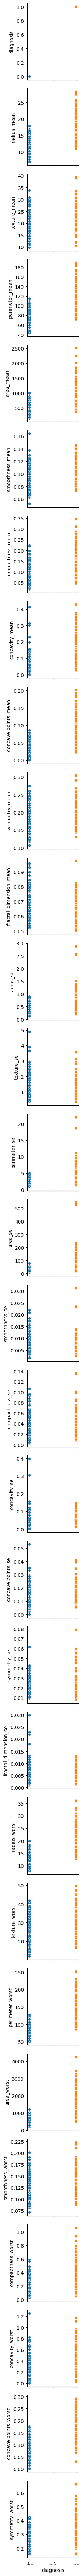

In [ ]:
# Create a grid of scatter plots
plt.figure(figsize=(20, 20))
g = sns.PairGrid(df, x_vars=["diagnosis"], y_vars=df.columns[:30], hue="diagnosis")
g.map(sns.scatterplot)
g.set(xlabel="diagnosis")

# Adjusting the layout
g.fig.tight_layout()

# Showing the plot
plt.show()

In [ ]:
# Visualizing data density curves and histograms
sns.set(style="white") # background is white
plt.figure(figsize=(20, 25))

<Figure size 2000x2500 with 0 Axes>

<Figure size 2000x2500 with 0 Axes>

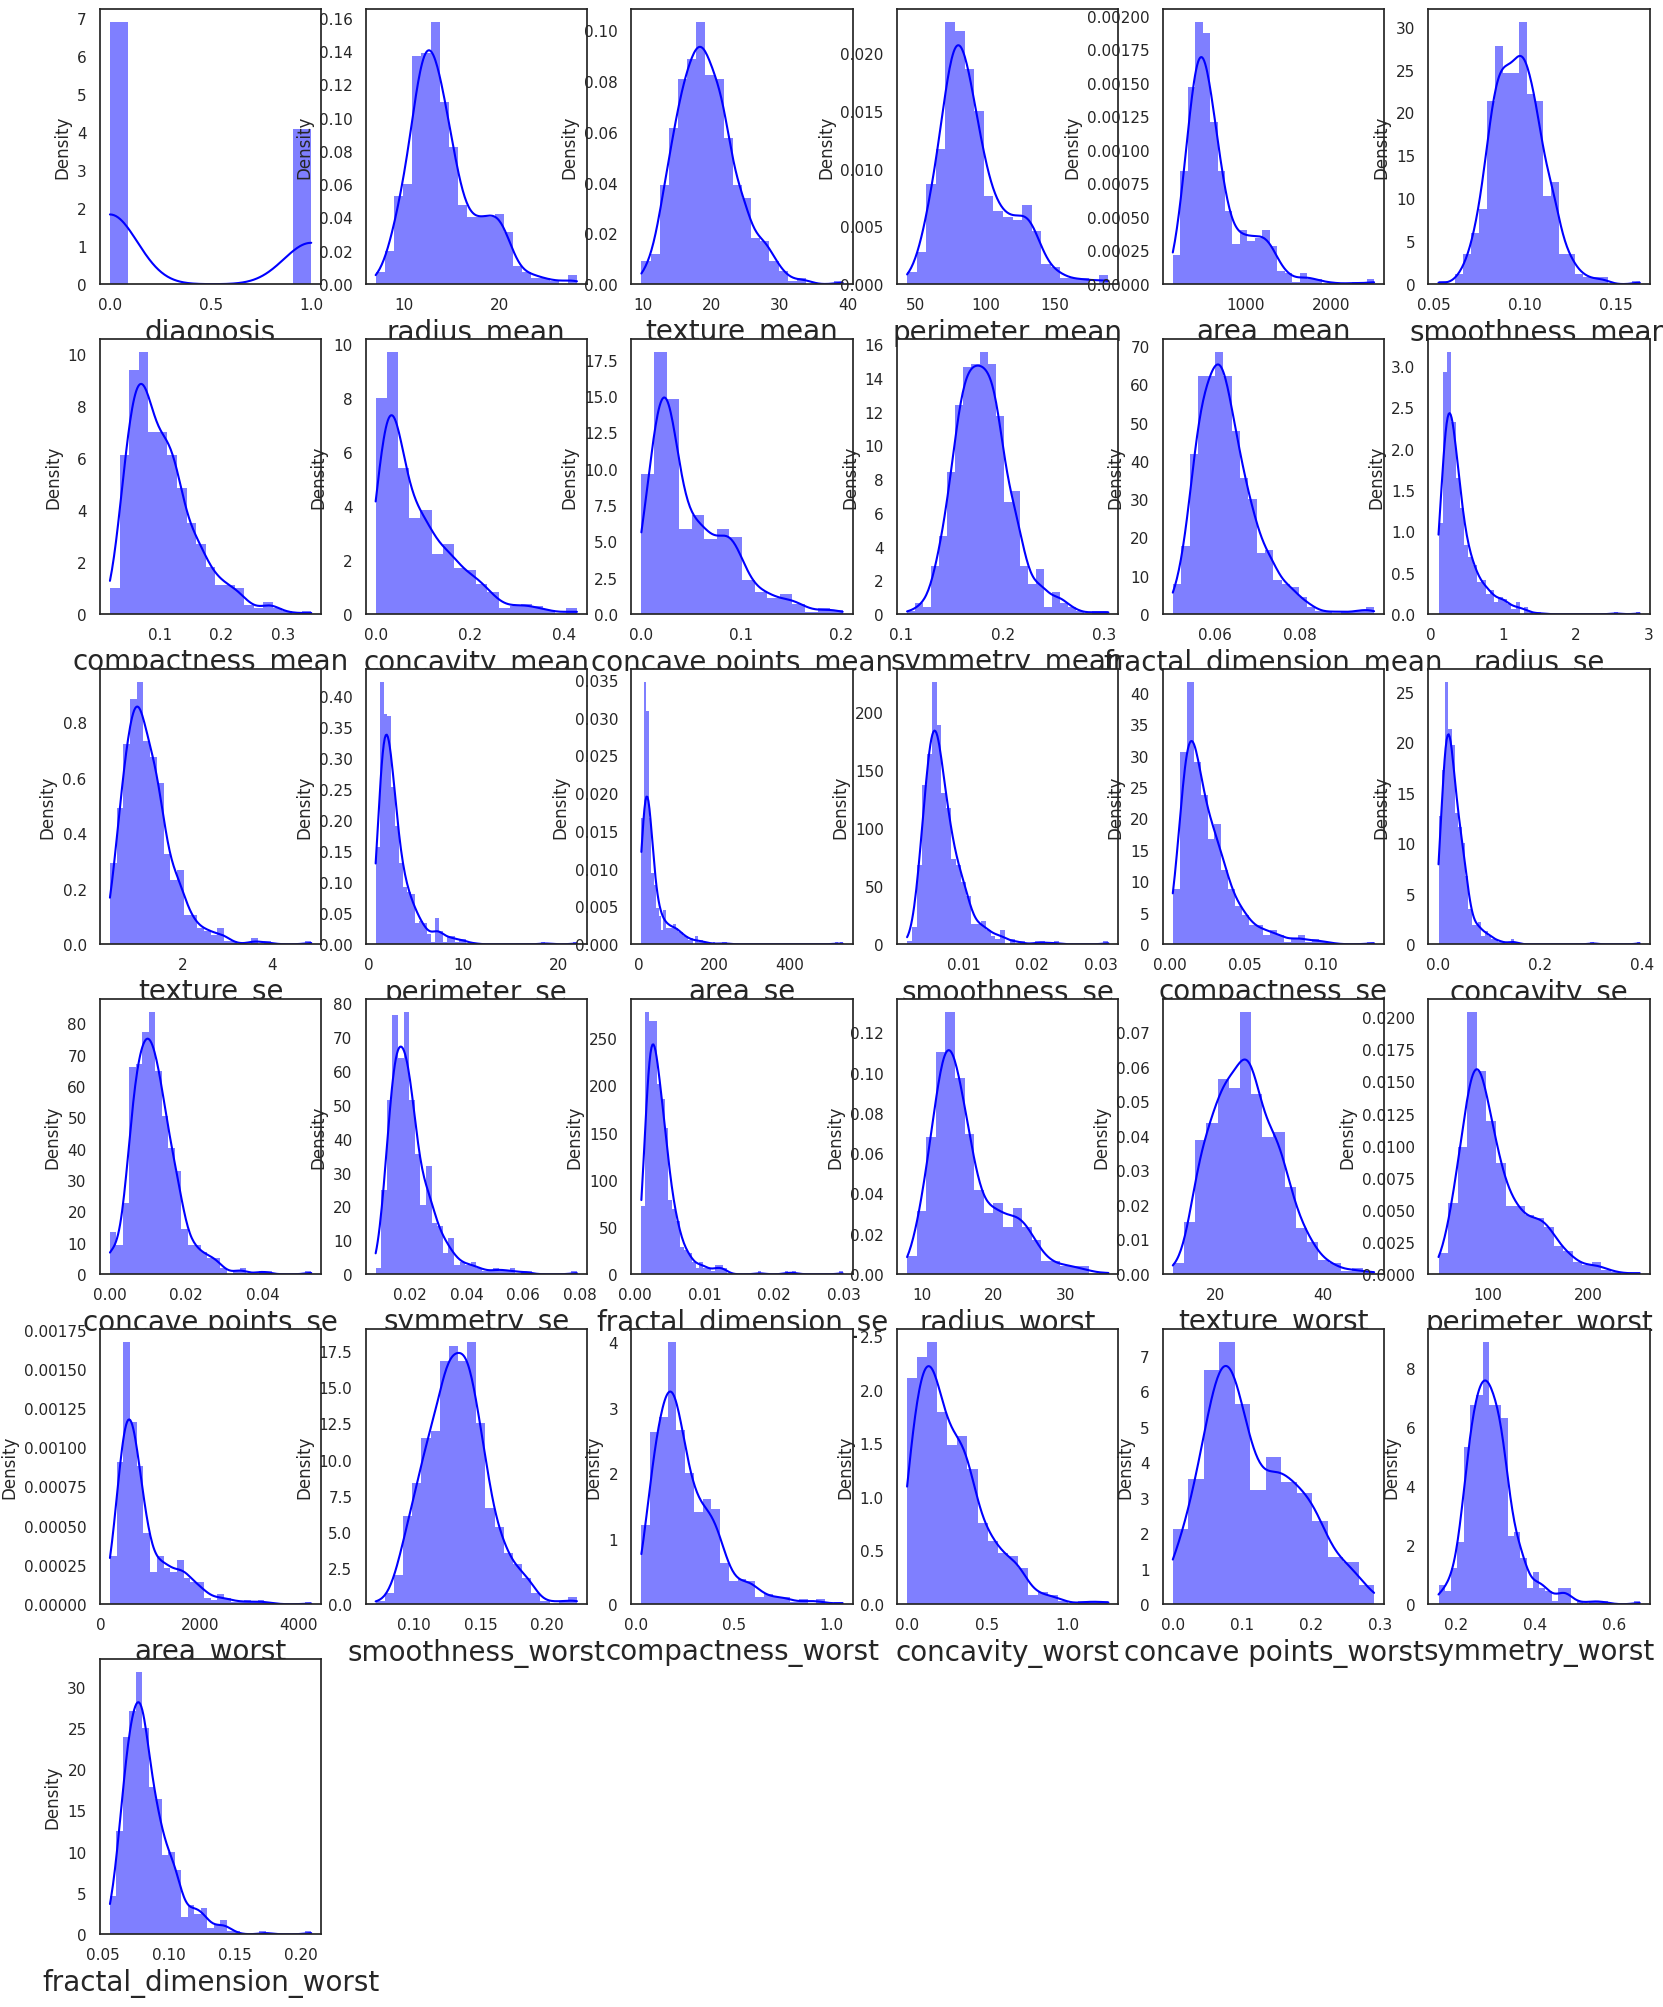

In [ ]:
# Visualizing data density curves and histograms
plt.figure(figsize=(20, 25), facecolor='white')
plot_num = 1

for column in df:
  if plot_num <= 31:
    ax = plt.subplot(6, 6, plot_num)
    sns.histplot(df[column], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
    plt.xlabel(column, fontsize=20)
  plot_num +=1
plt.show()

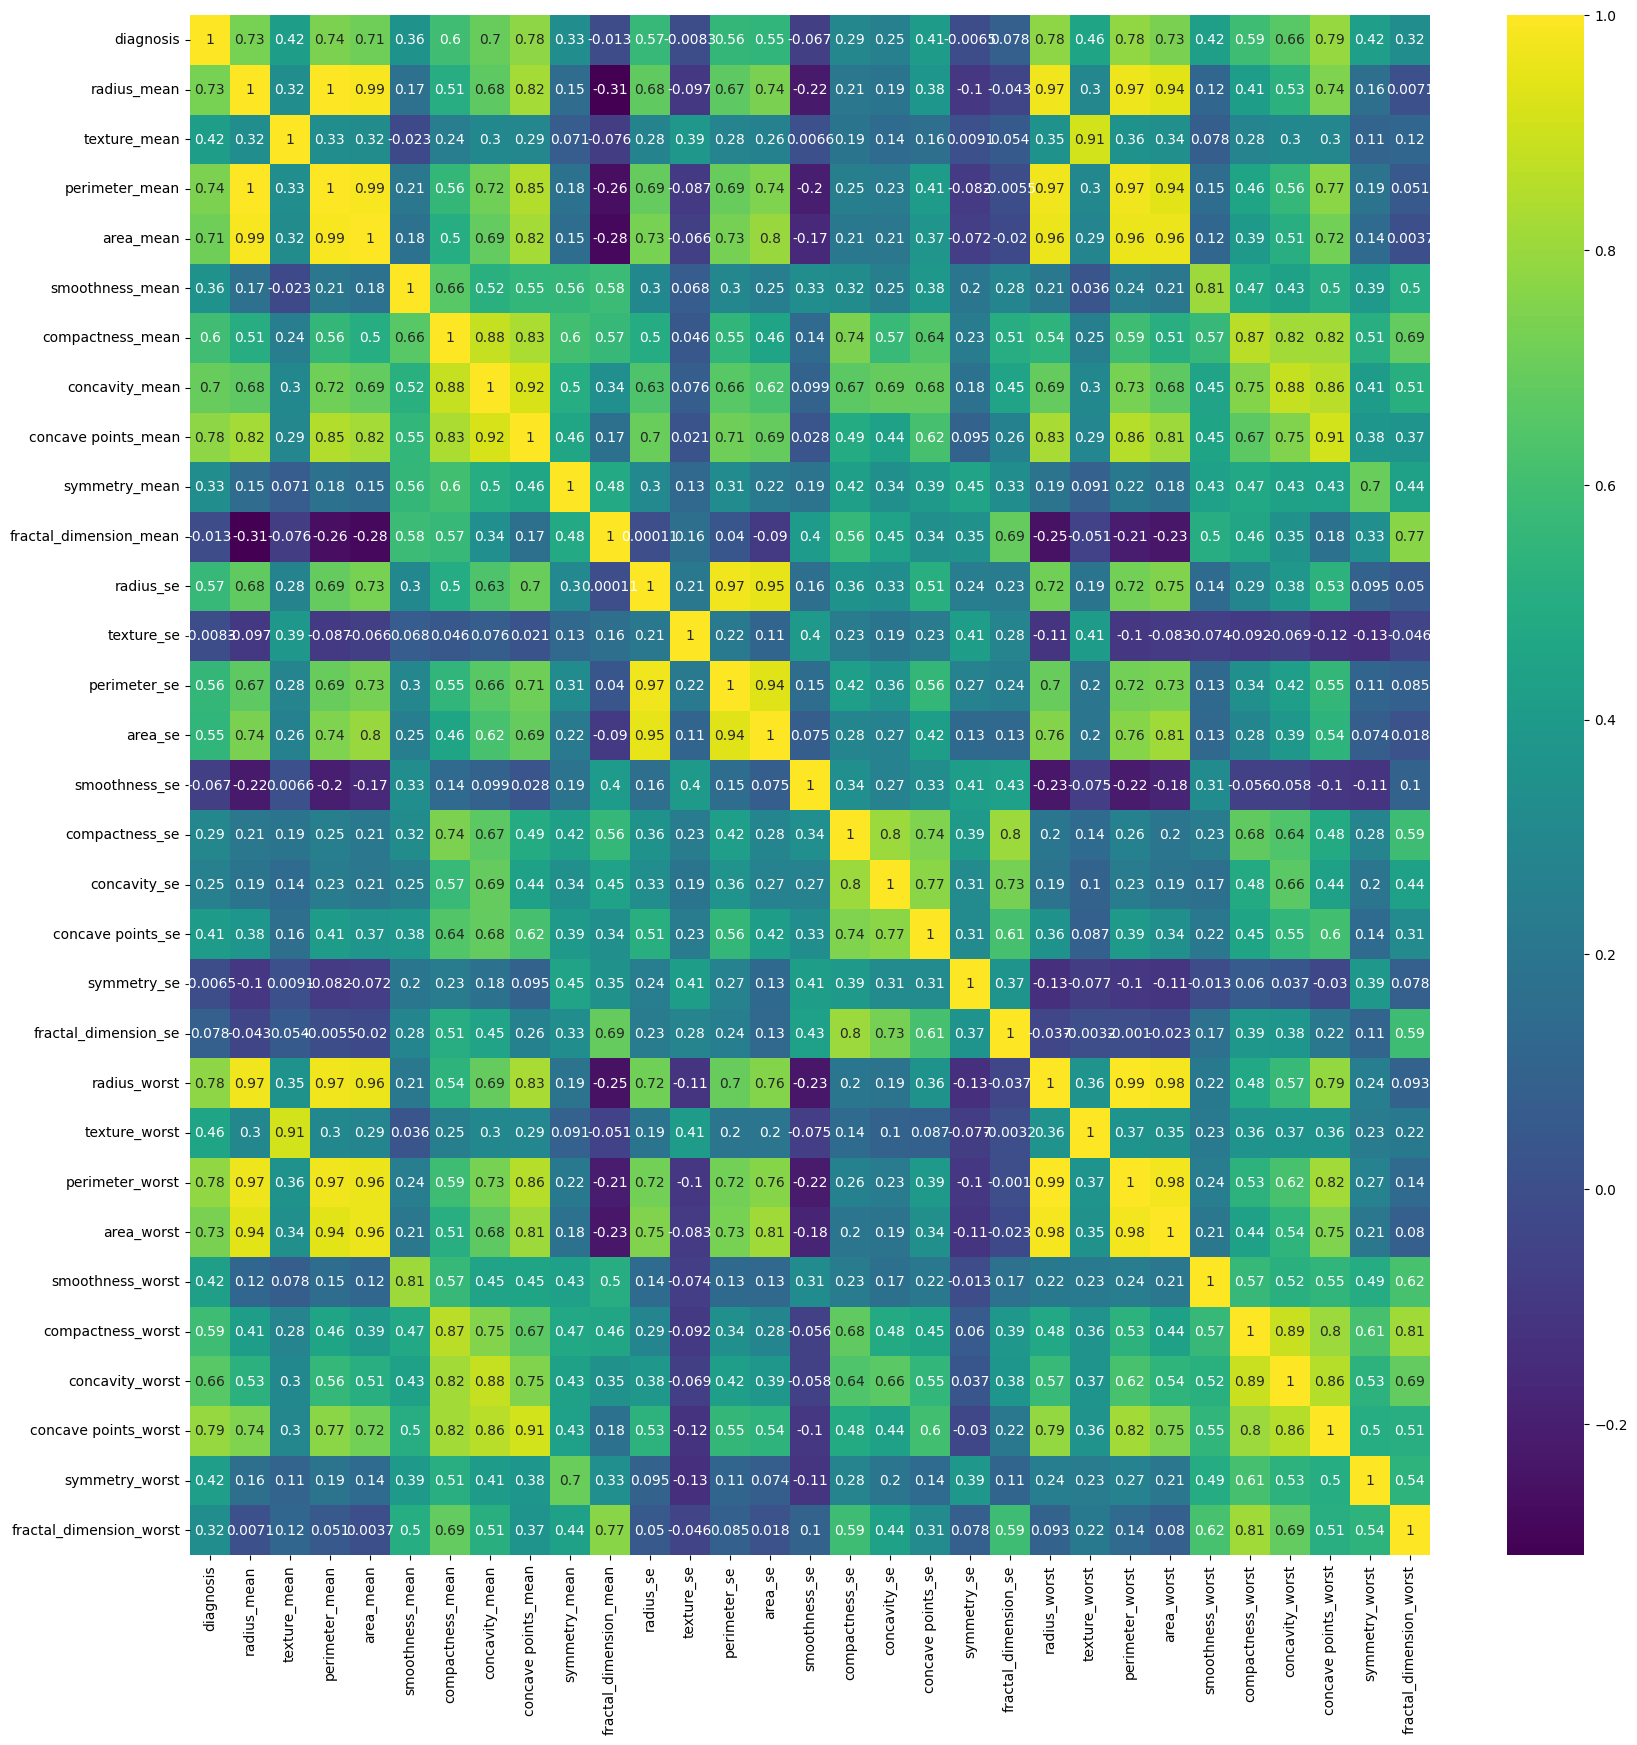

In [ ]:
# Creating a correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="viridis", cbar=True)
plt.show()

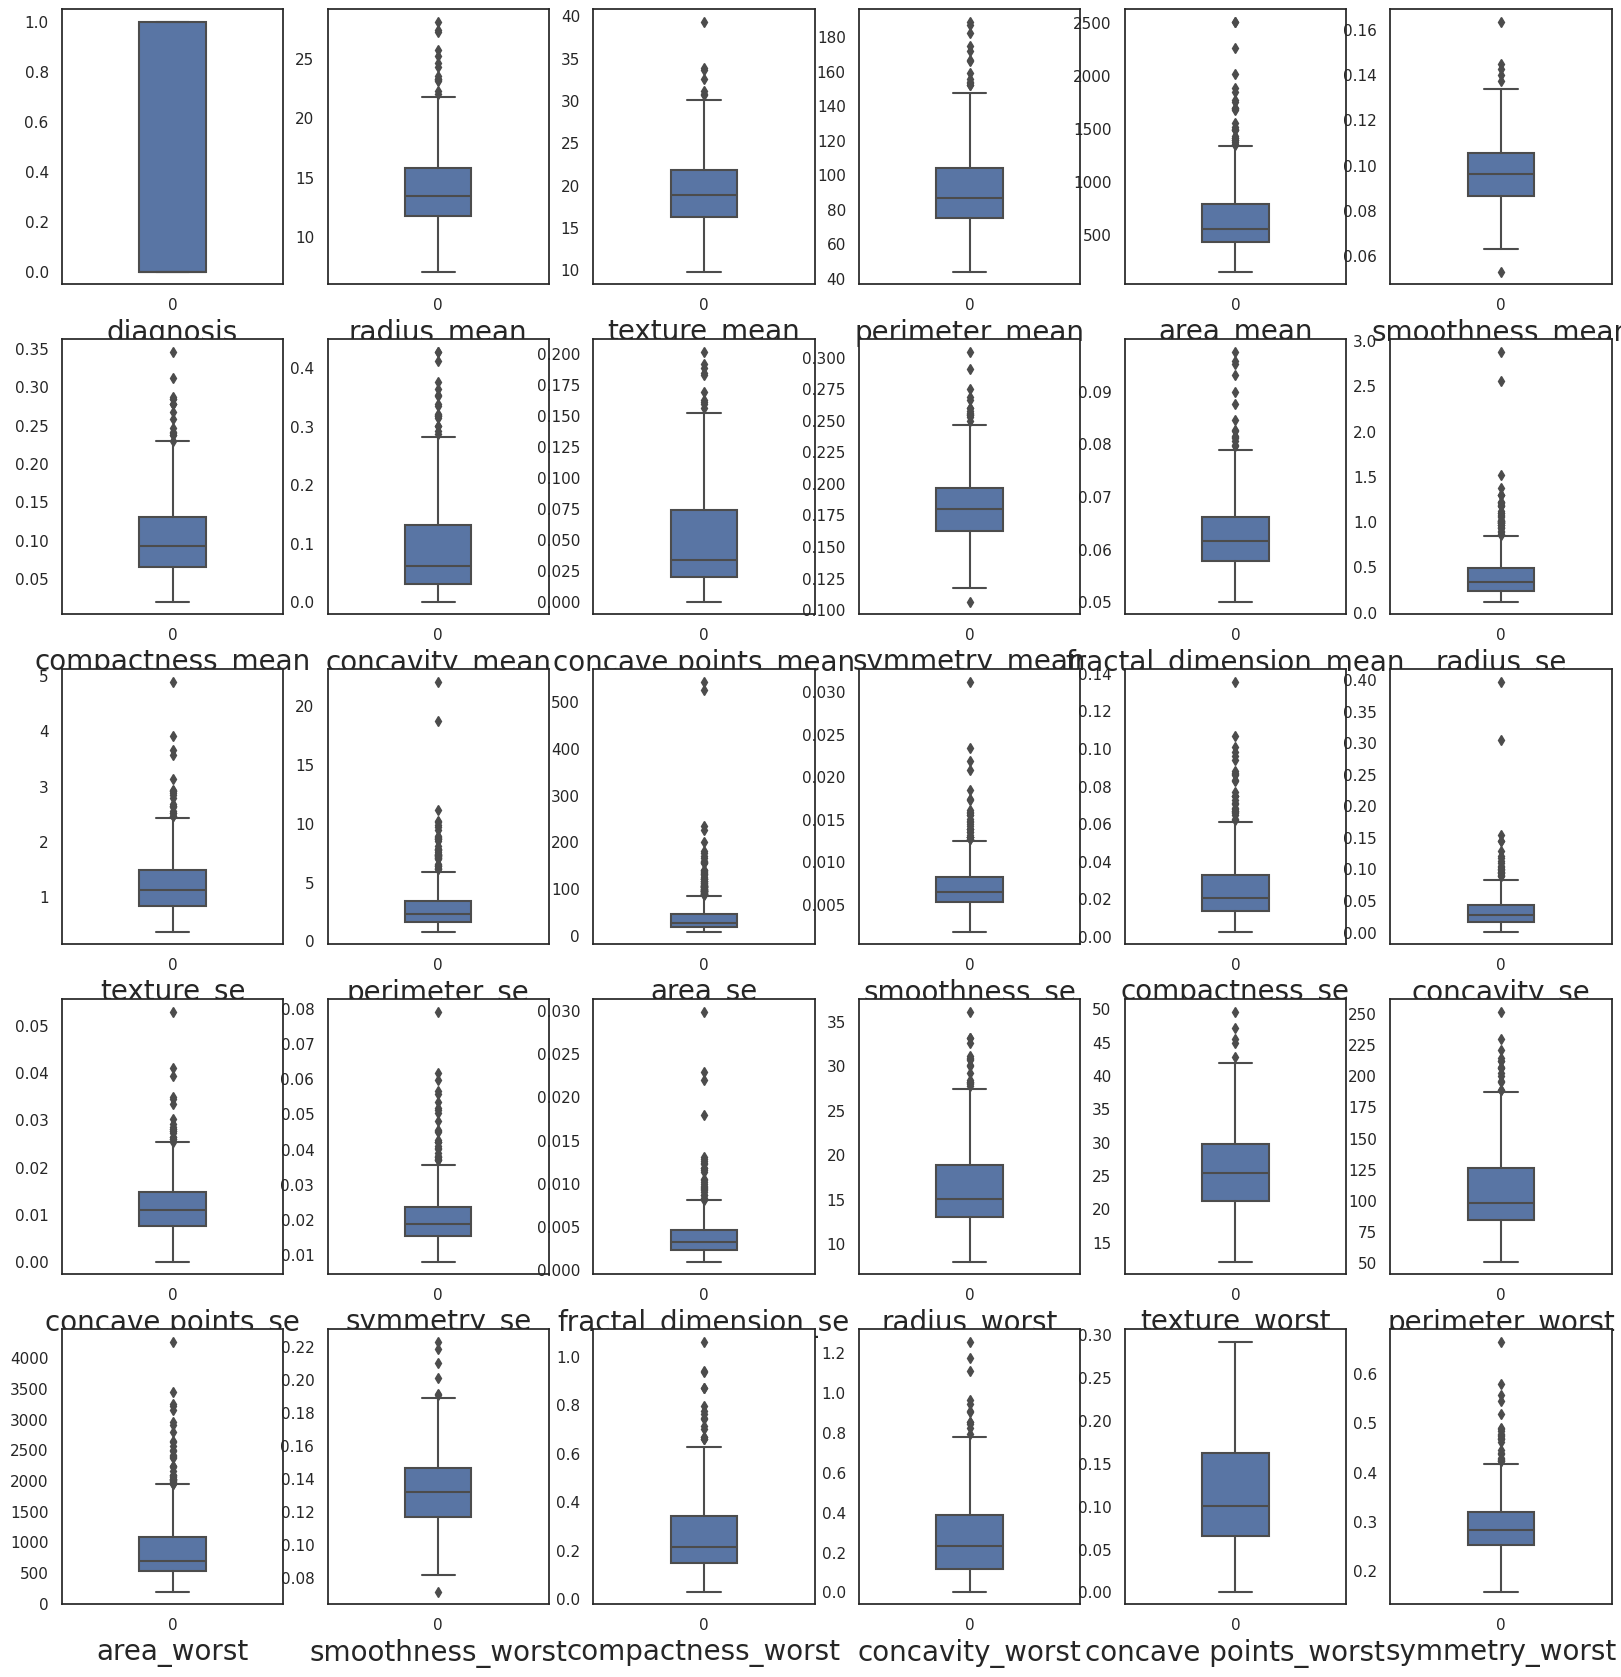

In [ ]:
# showing individual column plot to find outliers
# this code is intended to create individual box plots for each column in the DataFrame to identify outliers.

# background white
plt.figure(figsize=(20, 25), facecolor='white')

plot_num = 1

# for Iteration
for column in df:
  if plot_num < 31:
    ax = plt.subplot(6, 6, plot_num)
    # Creating a box plot for the current column, visualizing its distribution and potential outliers.
    sns.boxplot(data=df[column], ax=ax, width=0.3, fliersize=5)
    plt.xlabel(column, fontsize=20)
  plot_num += 1

# Displaying the created subplots as a single figure.
plt.show()








"Key Visualization Insights:

Outliers are prevalent in most features. Addressing outliers can be done using the Interquartile Range (IQR) method.

The heatmap correlation reveals that 'fractal_dimension_mean,' 'smoothness_se,' and 'symmetry_se' exhibit relatively low correlations with other columns. This suggests potential model underfitting. We'll exclude these columns from the dataset to assess and potentially improve model accuracy.

In [ ]:
df1 = df.drop(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se'], axis=1)

In [ ]:
len(df1.columns)

27

In [ ]:
df1.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

We can apply the Z-score method for outlier detection and handling to each column in a DataFrame

In [ ]:
# creating loop
for column in df.columns:
    # calculating the z-scores for each data point in the current column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # defining a threshold (e.g. 3 standard deviations)
    threshold = 3.0

    # replacing outliers with the median value of the column
    df.loc[z_scores > threshold, column] = df[column].median()

In [ ]:
We can apply the IQR method for outlier detection and handling to each column in a DataFrame

In [ ]:

for column in df1.columns:
    # Calculating the IQR for the current column
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining upper and lower limits for outliers
    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR

    # Replacing outliers with the nearest limit
    df1[column] = df1[column].apply(lambda x: upper_lim if x > upper_lim else (lower_lim if x < lower_lim else x))



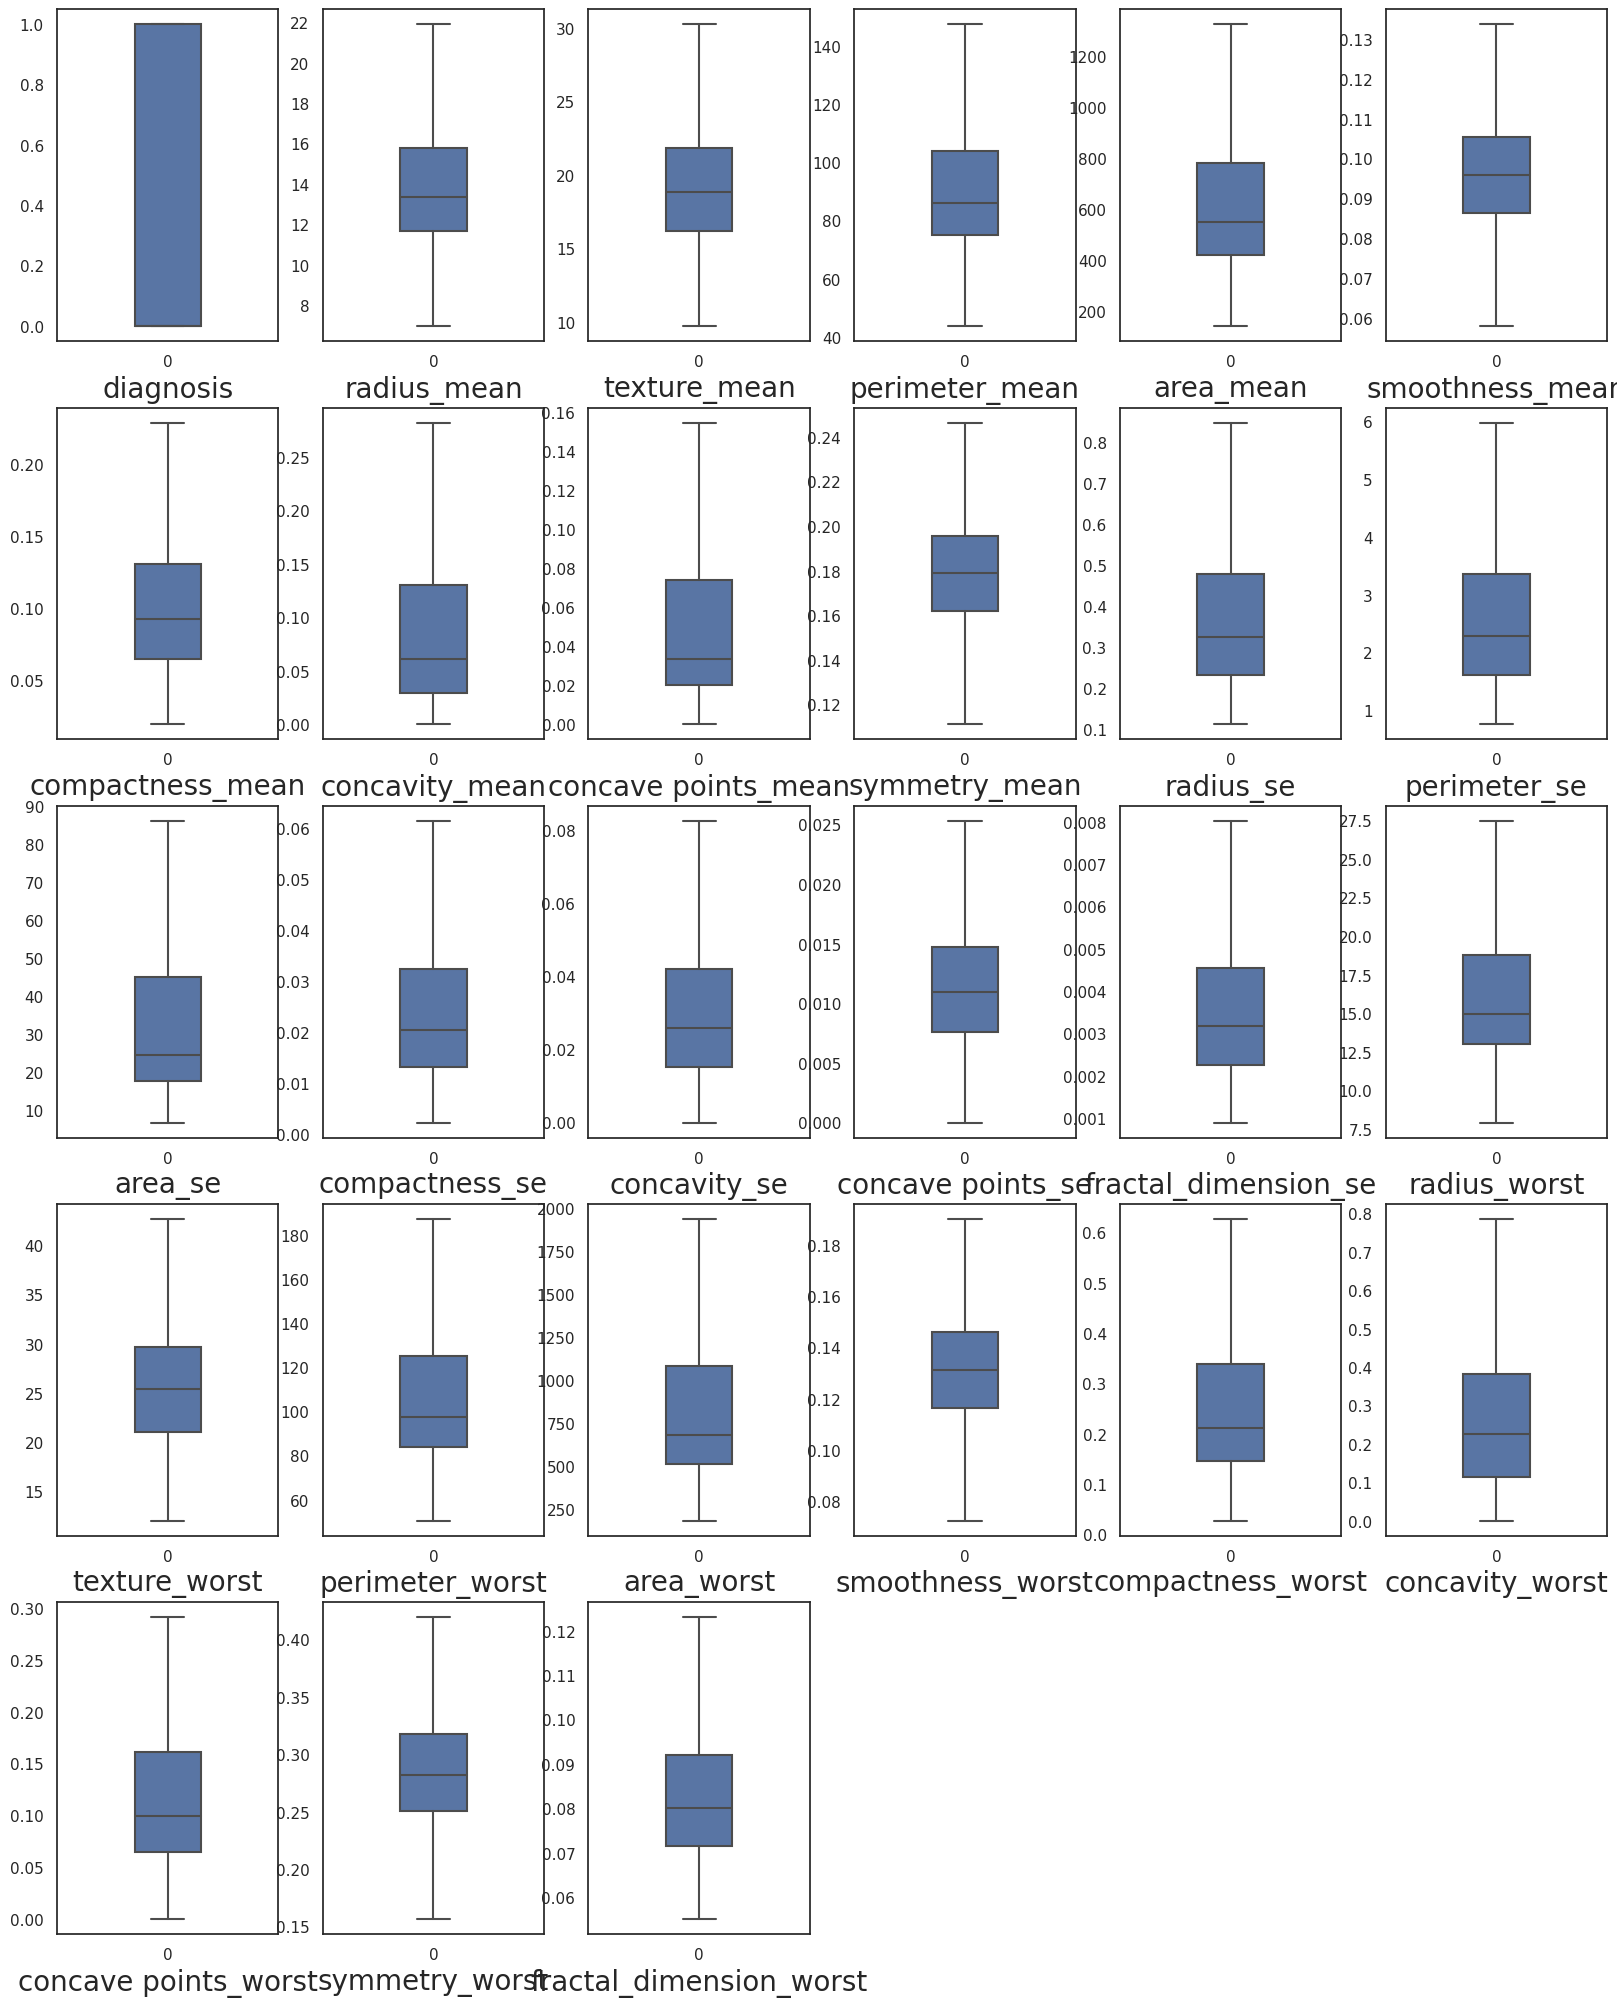

In [ ]:
plt.figure(figsize=(20, 25), facecolor='white')


plot_num = 1

for column in df1:

    if plot_num <= 27:

        ax = plt.subplot(5, 6, plot_num)

        # creating a box plot for the current column, visualizing its distribution and potential outliers
        sns.boxplot(data=df1[column], ax=ax, width=0.3, fliersize=5)

        # setting the x-axis label of the subplot to the name of the column with a specified font size
        plt.xlabel(column, fontsize=20)

    plot_num += 1

plt.show()

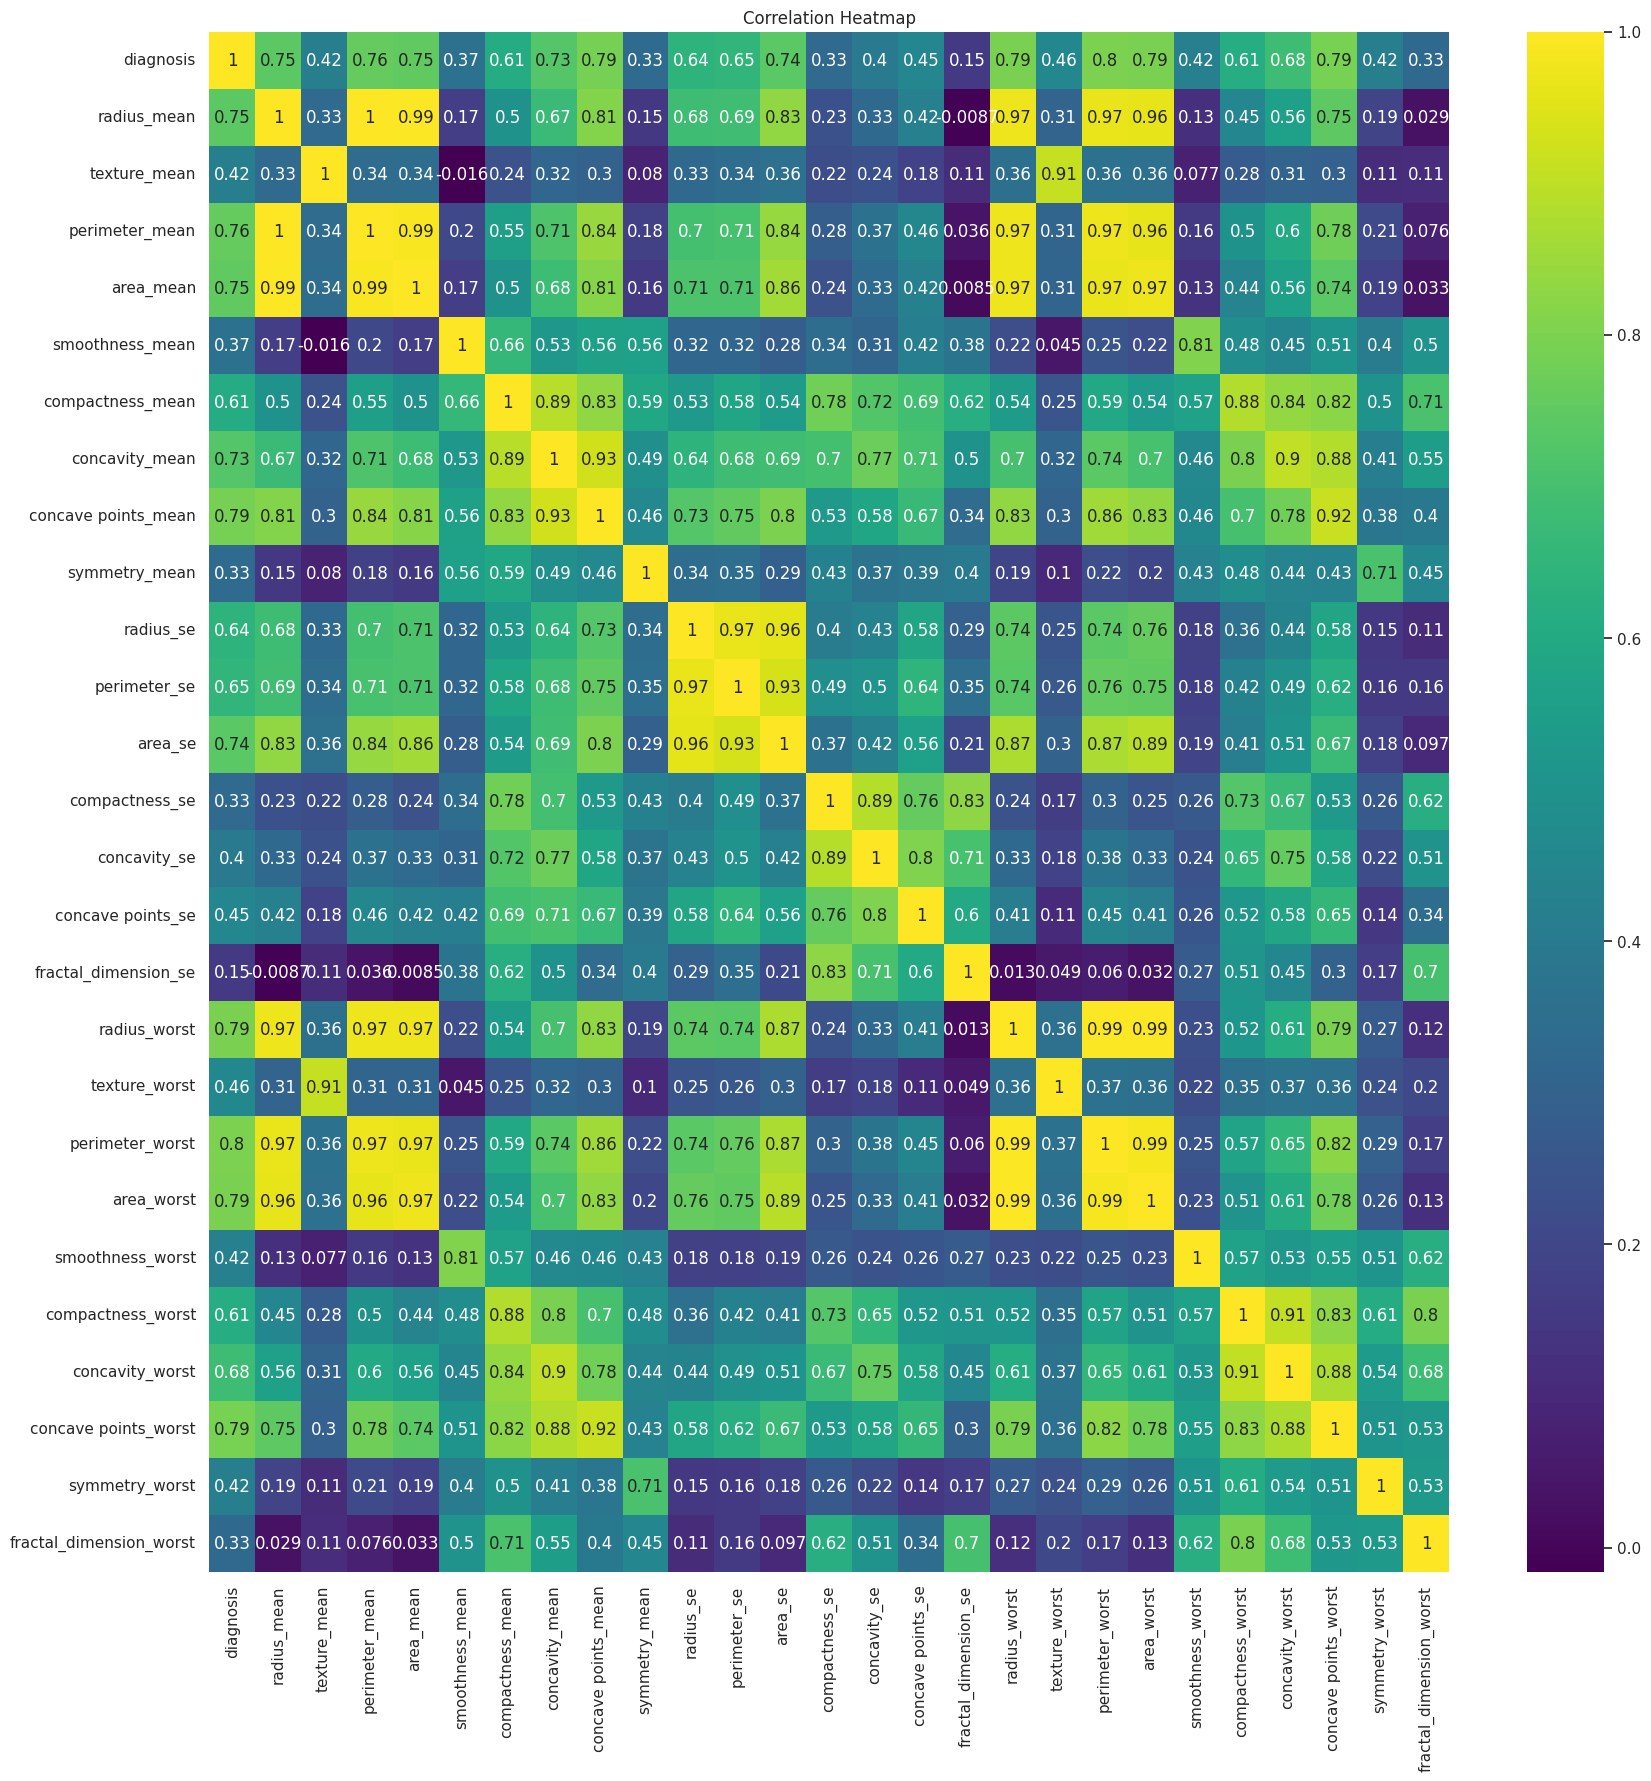

In [ ]:
# creating a heatmap to show correlations
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df1.corr(), annot=True, cmap="viridis", cbar=True)


ax.set_title("Correlation Heatmap")


plt.show()

In [ ]:
# dropping the 'diagnosis' column to create the feature variables 'x'
x = df1.drop(['diagnosis'], axis=1)

# assigning the 'diagnosis' column as the target variable 'y'
y = df1['diagnosis']

# displaying 'y' (the target variable)
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

In [49]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB #it's often use for cotinuous data

In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA #Principal Component Analysis #a dimensionality reduction technique often used for feature selection or feature engineering

In [60]:
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler, MinMaxScaler

Normalizer: for feature scaling by normalizing data.
StandardScaler: to standardize features by removing the mean and scaling to unit variance.
RobustScaler: this class scales features using robust statistics to handle outliers.
MinMaxScaler: this class scales features to a specified range (usually [0, 1]).

In [55]:
# initializing the StandardScaler
scaler = StandardScaler()

# fitting and transforming the features using the scaler
data_scaled = scaler.fit_transform(x)

# creating a new DataFrame with the standardized data and the original column names
data = pd.DataFrame(data_scaled, columns=x.columns)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,  y, test_size = 0.25, random_state=42)

In [59]:
from sklearn.svm import SVC  #Support Vector Classification
from sklearn.model_selection import GridSearchCV

# defining a dictionary of hyperparameter values to search
grid_param = {
    'C': [0.1, 0.01, 0.1, 1, 100],
    'gamma': [1, 0.75, 0.5, 0.25],
    'kernel': ['rbf', 'poly', 'linear']
}

# creating a GridSearchCV object with the SVM classifier
grid = GridSearchCV(estimator=SVC(), param_grid=grid_param, refit=True, verbose=3)

# fitting the grid search to the training data
grid.fit(x_train, y_train)

# the best hyperparameters found during the grid search
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.974 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.921 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.974 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.961 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.895 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

 1. Kernels enable the transformation of data from a lower-dimensional input space to a higher-dimensional feature space. This transformation can make it easier to separate data that is not linearly separable in the original input space. For example, if data points are not linearly separable in 2D, they might become separable in 3D or higher dimensions after applying a kernel.

 2. Linear Kernel: It is used when data is linearly separable.

In [63]:
# Cross-validating for SVM accuracy
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# creating an SVM classifier with specified hyperparameters
svm = SVC(C=0.1, gamma=1, kernel='linear', probability=True)
svm_ypredict = cross_val_predict(svm, x_test, y_test, cv=9)
svm_accuracy = accuracy_score(y_test, svm_ypredict) * 100
print(f"Accuracy of SVM Classifier: {'{:.3f}'.format(svm_accuracy)}")

Accuracy of SVM Classifier: 97.340


cross_val_predict: for cross-validated predictions GridSearchCV: for hyperparameter tuning.
accuracy_score: for calculating the accuracy by comparing predicted labels to true labels.
classification_report: for precision, recall, F1-score
confusion_matrix: for evaluating the performance of a classification model.

In [65]:
#Cross-validating for Logistic accuracy
from sklearn.linear_model import LogisticRegression

# creating a classifier
log_reg = LogisticRegression()

log_predict = cross_val_predict(log_reg, x_test, y_test, cv=10)

log_accuracy = accuracy_score(y_test, log_predict) * 100

print(f"Accuracy of Logistic Regression: {'{:.3f}'.format(log_accuracy)}")

Accuracy of Logistic Regression: 97.872


In [67]:
#for classification report
# creating a classifier with specified hyperparameters
svm = SVC(C=0.1, gamma=1, kernel='linear', probability=True)

svm.fit(x_train, y_train)

svm_predict = svm.predict(x_test)

svm_classification_report = classification_report(y_test, svm_predict)
print("Classification Report for SVM Classifier:")
print(svm_classification_report)


Classification Report for SVM Classifier:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       121
         1.0       0.98      0.97      0.98        67

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



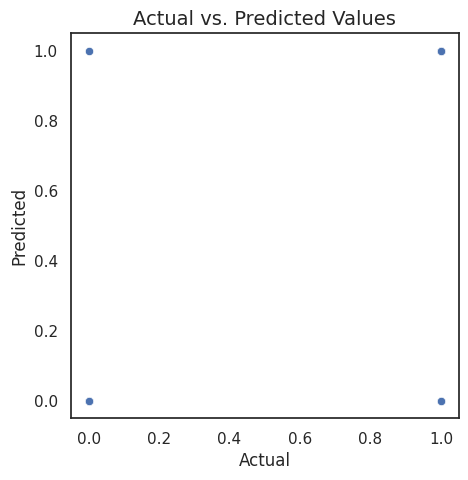

In [69]:
# creating the Scatter Plot: to decide whether this Data set is working good at linear model

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=y_test, y=svm_predict, ax=ax)


plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

plt.title("Actual vs. Predicted Values", fontsize=14)

plt.show()

In [70]:
# creating a Voting Classifier with specified estimators and voting method
estimators = [("SVM", svm), ("LogisticRegression", log_reg)]
vtc = VotingClassifier(estimators=estimators, voting='soft')

# fitting training data
vtc.fit(x_train, y_train)

#predicting
vtc_predict = vtc.predict(x_test)

vtc_classification_report = classification_report(y_test, vtc_predict)
print("Classification Report for Voting Classifier:")
print(vtc_classification_report)

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       121
         1.0       0.99      0.99      0.99        67

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



The classification report for the Voting Classifier shows exceptional performance with high precision, recall, and F1-score for both classes (0.0 and 1.0), resulting in an overall accuracy of 99% on a dataset with 188 samples.

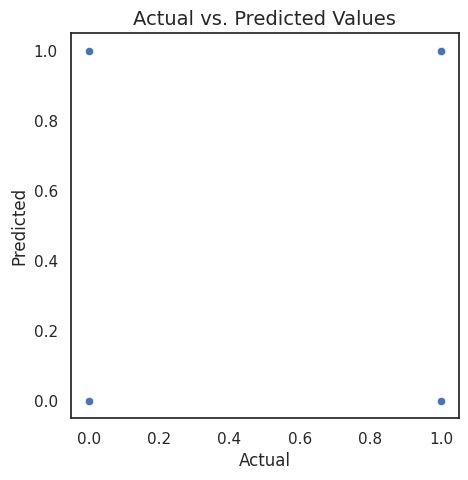

In [71]:
# for visual assessment of the above model performance
# creating a scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=y_test, y=vtc_predict, ax=ax)

ax.set_xlabel("Actual", fontsize=12)
ax.set_ylabel("Predicted", fontsize=12)

ax.set_title("Actual vs. Predicted Values", fontsize=14)

plt.show()

ROC Curve (Receiver Operating Characteristic Curve):
the ROC curve is a graphical representation of a model's ability to trade off true positives and false positives at different threshold levels.

AUC (Area Under the Curve): The AUC provides a single metric to summarize this performance. A higher AUC indicates better classification performance, with 1.0 being perfect and 0.5 indicating random guessing.

AUC Score: 0.99


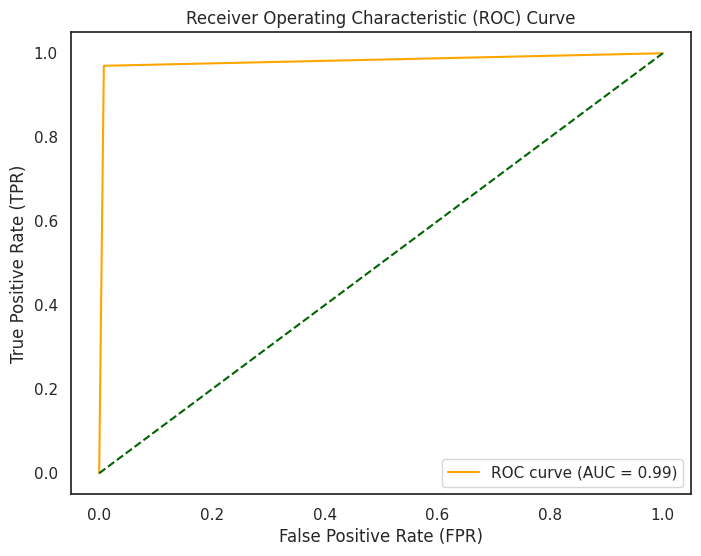

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve
# calculating AUC
auc_score = roc_auc_score(y_test, vtc_predict)
print("AUC Score: {:.2f}".format(auc_score))

# calculating ROC curve
fpr, tpr, threshold = roc_curve(y_test, svm_predict)

# plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()